# Encuesta de factores sociales 

## Separar por municipio

Analisis a realizar:

- El informe se entrega "Por objetivos".
- Estadisticos descriptivos para todas las variables.
- La vereda debe cruzarse con el municipio.
- Cada variable se presenta con tabla de frecuencia absoluta y relativa.
- Las variables de consumo deben cruzarsse con las variables demográficas.
- Tablas descriptivas (con estadísticos descriptivos) (parafrasear las tablas).

- Cross tabs

"Gráficamente agradables" Diseño de gráficos

- tema ggplot2:
p2 + theme_hc() + scale_colour_hc()


- programa territorio seguro. (cundinamarca territorio seguro)
garantizar convivencia pacífica.
prom y prev riesgos 
control situaciones problema
sustentabilidad de la convivencia

### Objetivo del estudio: perfiiles de personas vulnerables frente a condiciones de riesgo de violencia y de consmo de SPA incluyendo alcohol.

Dimensiones de las encuestas:
- condiciones sociodemográficas (pobreza - delincuencia)
- condiciones familiares (violencia intrafamiliar)
- condiciones personales consumo y conducta delictiva

### Identificar vulnerabilidad para violencia y consumo de SPA

- Perfiles vulnerables.
- clustering por víctimas.
- sectorización (mínimo por municipio)

### microtráfico.

¿qué condiciones favorecen el microtráfico y que perfiles para vulnerabilidad de violencia y consumo?

# La promesa es descriptivos con crosstabs!!!!

In [1]:
# Libraries
#install.packages("ggplot2", repos='https://cloud.r-project.org')
library (ggplot2)
library (reshape2)
library (scales)

#install.packages("ggthemes", repos='https://cloud.r-project.org')
#library (ggthemes)


Warning message:
: package 'ggplot2' was built under R version 3.3.2Warning message:
: package 'scales' was built under R version 3.3.2

In [2]:
# Load Files
vars_code=read.csv2(file="estructura_enc.csv")
data=read.csv2(file="Test1_Data.csv")
data=data[-1] # Remove sequence IDs
data_raw=data

familiares=read.csv2(file="familiares.csv")
veredas=read.csv2(file="veredas.csv")
departamentos=read.csv2(file="departamentos.csv")
ciudades=read.csv2(file="ciudades.csv")
vars_estudiar=read.csv2(file="vars_estudiar.csv")

## Preprocessing


In [3]:
estruct=vars_code[match((unique(vars_code[,1])),vars_code[,1]),1:5]
#estruct$tipo_var=as.character(estruct$tipo_var)
reacts=estruct[,4]
head(estruct,n = 15)

,var,Componente,Escala,React,tipo_var
1,1,Condiciones sociodemográficas,Socio Demográfico,Nombres_y_Apellidos,Texto
2,2,Condiciones sociodemográficas,Socio Demográfico,Municipio,Factor
6,3,Condiciones sociodemográficas,Socio Demográfico,Vereda_Residencia_,Texto
7,4,Condiciones sociodemográficas,Socio Demográfico,Dirección_,Texto
8,5,Condiciones sociodemográficas,Socio Demográfico,Teléfono,Texto
9,6,Condiciones sociodemográficas,Socio Demográfico,1_Sexo,Factor
12,7,Condiciones sociodemográficas,Socio Demográfico,2_Edad_,Numeric
13,8,Condiciones sociodemográficas,Socio Demográfico,3_Solo_Mujeres_Actualmente_es_,Factor
17,9,Condiciones sociodemográficas,Socio Demográfico,4_Tiene_Hijos,Factor
20,10,Condiciones sociodemográficas,Socio Demográfico,5_No_Hijjos_Cuantos_hijos_tiene_,Numeric


In [4]:
for (i in 1: ncol(data)){
    if (estruct$tipo_var[i]=="Factor"){
        data[,i]=factor(data[,i],vars_code[vars_code$var==i,6],vars_code[vars_code$var==i,7])
    }
    if (estruct$tipo_var[i]=="Familiares"){
        data[,i]=factor(data[,i],familiares$cod_famil,familiares$famil_nom)
    }
    if (estruct$tipo_var[i]=="Departamento"){
        data[,i]=factor(data[,i],departamentos$cod_dep,departamentos$Dep_nom)
    }
    if (estruct$tipo_var[i]=="Ciudades"){
        data[,i]=factor(data[,i],ciudades$cod_ciud,ciudades$Ciud_nom)
    }
}

Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecated

In [5]:
table(estruct$tipo_var)


                 Ciudades Departamento       Factor   Familiares      Numeric 
          46            1            2          129           39          112 
       Texto 
          20 

In [6]:
data.frame(react=names(data),tipo_var=estruct$tipo_var)[1:20,]

,react,tipo_var
1,X1,Texto
2,X2,Factor
3,X3,Texto
4,X4,Texto
5,X5,Texto
6,X6,Factor
7,X7,Numeric
8,X8,Factor
9,X9,Factor
10,X10,Numeric


## Graficar variables

In [7]:
size_pic_w=7
size_pic_h=4

In [8]:
data_normalzd=NULL
nm <- names(data)
for (i in seq_along(nm)) {
    if (estruct$tipo_var[i]=="Numeric"){
        x=data[i]
        normin_max = (x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))
        data_normalzd=cbind(data_normalzd,normin_max)
        #print(
            ggplot(data,aes_string(x = nm[i]))+
              geom_histogram(alpha = .75,fill = "mediumseagreen")+
              theme(axis.title.x=element_blank())+
              theme(axis.title.y=element_blank())+
              #coord_flip()+
              labs(title=estruct$React[i])
        #)
              ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
    }else{
        x=data[,i]
        to_dummys=model.matrix(~as.matrix(data_raw[i])+0)
        data_normalzd=cbind(data_normalzd,to_dummys)
#    if (estruct$tipo_var[i]=="Factor"){
        #print(
            ggplot(data,aes_string(x = nm[i]))+
              geom_bar(stat="count",alpha = .75,fill = "mediumseagreen")+
              theme(axis.title.x=element_blank())+
              theme(axis.title.y=element_blank())+
              coord_flip()+
              labs(title=estruct$React[i])
        #)
              ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
    }
  }  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecatedWarning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecated`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pi

[1]  241 1141

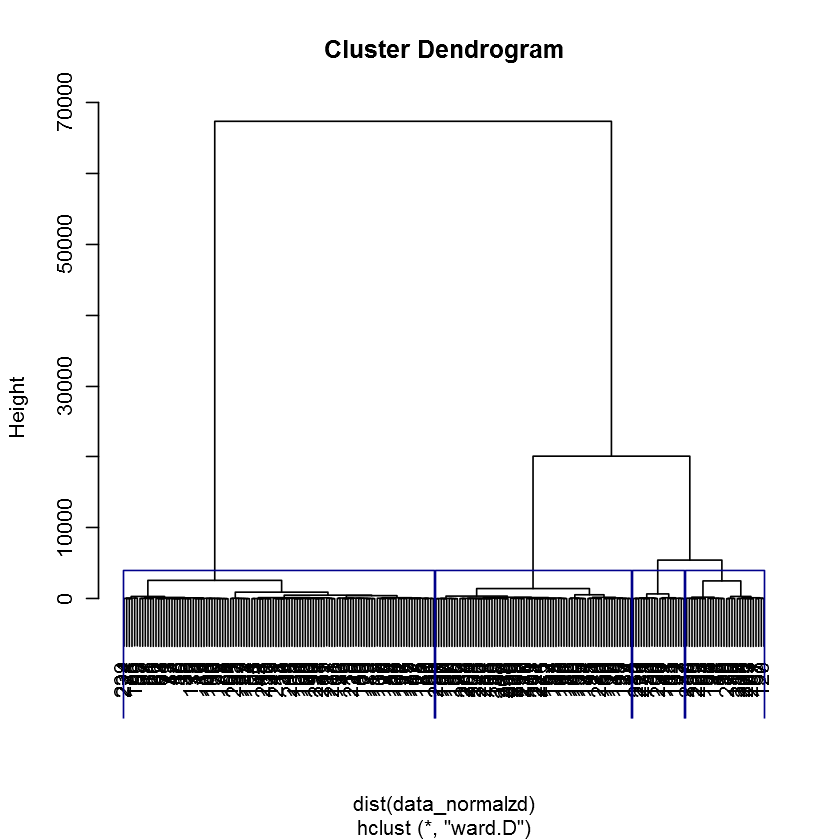

In [9]:
dim(data_normalzd)
dend_data_normalzd=hclust(dist(data_normalzd),method="ward.D")
k_groups=4
#jpeg(file = "dendrograma.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(dend_data_normalzd)#,horiz=T)#,hang=-1)
groups<- factor(cutree(dend_data_normalzd, k=k_groups) )
rect.hclust(dend_data_normalzd, k=k_groups, border="darkblue") 
#dev.off()

In [46]:
dend_reacts=hclust(dist(t(data)),method="ward.D")

#jpeg(file = "dendrograma.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(dend_reacts)#,hang=-1)
#groups<- factor(cutree(dend_test4, k=k_groups) )
#rect.hclust(dend_test4, k=k_groups, border="darkblue") 
#dev.off()

Warning message:
In dist(t(data)): NAs introducidos por coerción

ERROR: Error in hclust(dist(t(data)), method = "ward.D"): NA/NaN/Inf en llamada a una función externa (arg 11)


## Tablas de frecuencia

In [10]:
agrupar_tablas=(unique(vars_estudiar$grups_vars))[-1]
for (group in agrupar_tablas){
    tbl=data[,vars_estudiar$grups_vars==group]
    vars_info=vars_estudiar[vars_estudiar$grups_vars==group,]
    colnames(tbl)=vars_estudiar$React[vars_estudiar$grups_vars==group]
    #print(head(tbl))
    #print(ggplot(datm,aes(x = variable, y = value,fill = ind)) + 
    #geom_bar(position = "fill",stat = "identity") + 
    #scale_y_continuous(labels = percent_format()))
}
head(tbl)
#agrupar_tablas

,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted.1,Quién_de_la_familia.1,HIJO_A_U_OTRO_MIEMBRO.1,...,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar.1,Severidad usted.1,Severidad familar.1
1,Nunca,Esposos-pareja,Nunca,0,0,0,0,Nunca,Esposos-pareja,Nunca,...,0,0,0,Nunca,Esposos-pareja,Nunca,0,0,0,0
2,Rara vez,Esposos-pareja,No reporta,0,0,0,0,Nunca,NA,No reporta,...,0,0,0,Rara vez,NA,No reporta,0,0,1,0
3,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Rara vez,NA,Nunca,0,0,1,0
4,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
5,Rara vez,NA,Nunca,0,0,1,0,Rara vez,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
6,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0


### Acceso a servicios

In [11]:
props=NULL
for(i in 20:27){
    props=cbind(props,table(data[,i]))
}
colnames(props)=vars_estudiar$React[20:27]
props
prop_services=melt(prop.table(props,margin = 2))
colnames(prop_services)=c("Acceso","Servicio","Proporción")
prop_services

,Luz,Agua_potable_domiciliaria,Teléfono_Local,Alcantarillado,Gas,Internet,Baño_domiciliario,Saneamiento_público
No,2,5,169,21,38,154,44,65
Si,239,236,72,220,203,87,197,176


,Acceso,Servicio,Proporción
1,No,Luz,0.00829875518672199
2,Si,Luz,0.991701244813278
3,No,Agua_potable_domiciliaria,0.020746887966805
4,Si,Agua_potable_domiciliaria,0.979253112033195
5,No,Teléfono_Local,0.701244813278008
6,Si,Teléfono_Local,0.298755186721992
7,No,Alcantarillado,0.0871369294605809
8,Si,Alcantarillado,0.912863070539419
9,No,Gas,0.157676348547718
10,Si,Gas,0.842323651452282


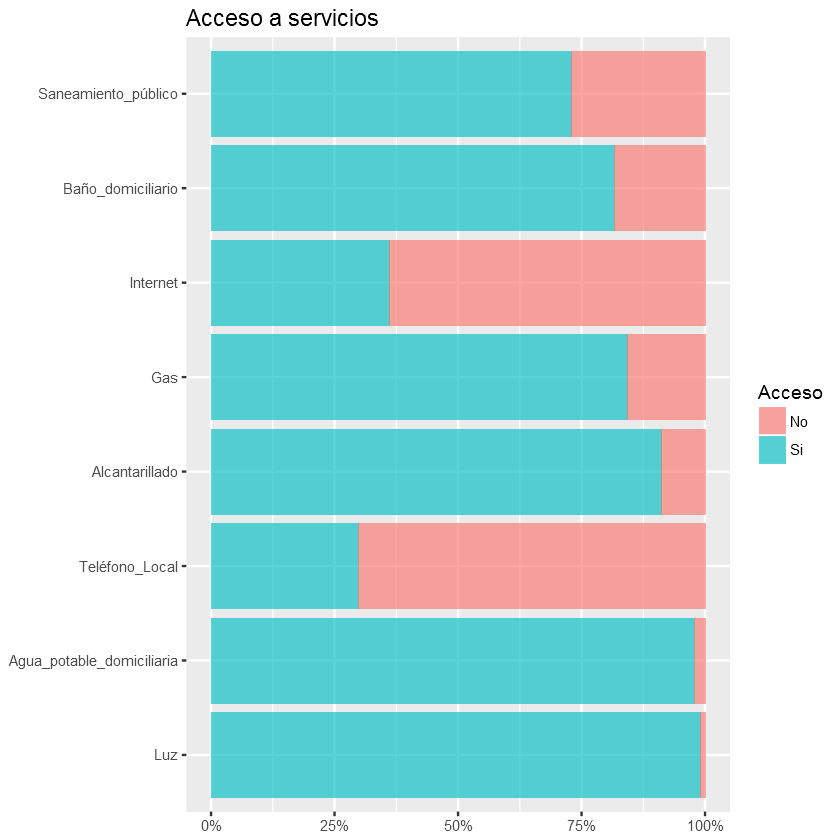

In [12]:
ggplot(prop_services,aes(x = Servicio, y=Proporción,fill=Acceso))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Acceso a servicios")+
coord_flip()
ggsave("Acceso a servicios.jpeg", width = size_pic_w, height = size_pic_h)

## Reciben ingresos

[1] reciben ingresos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

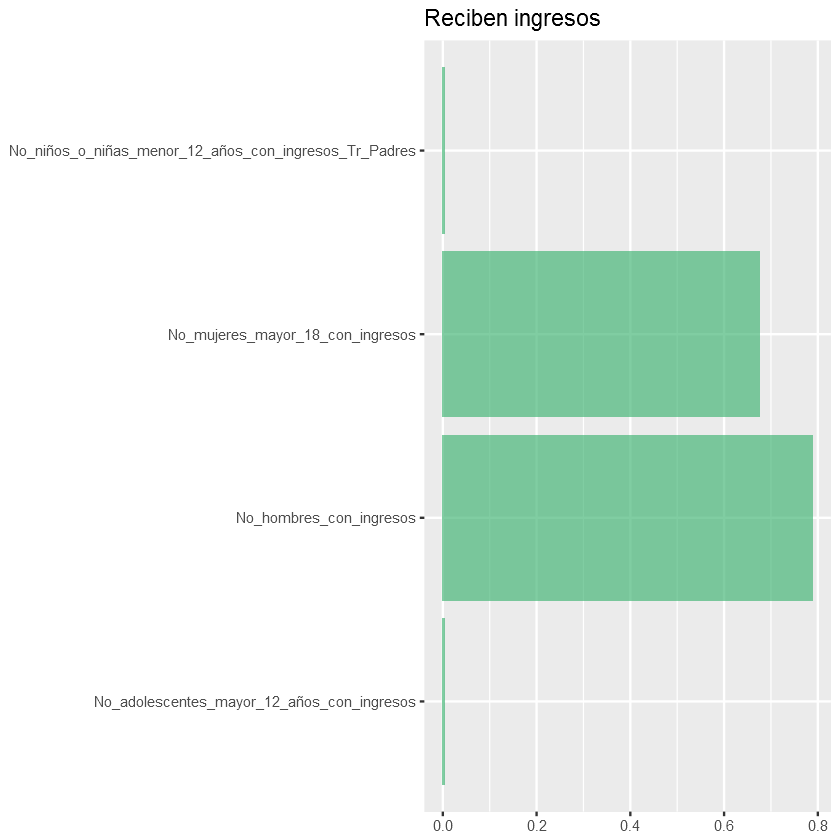

In [13]:
indx=2
agrupar_tablas[indx]
dtbl_ingr=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_ingr)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_ingr=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]

ingrss_prom=data.frame(colMeans(dtbl_ingr))
colnames(ingrss_prom)="Promedio"
ingrss_prom=data.frame(Fuente=rownames(ingrss_prom),Promedio=ingrss_prom$Promedio)
ingrss_prom=ingrss_prom[ingrss_prom$Promedio>0,]

ggplot(ingrss_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Reciben ingresos")
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Razones comisaría

[1] razones comisaria
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Violencia_intrafamiliar_,Cuotas_alimentarias,Abuso_sexual_niños,Drogas_Alcohol,Desobediencia,Bullyng o mtoneo,Otros_
No,236,229,239,240,240,240,238
Si,5,12,2,1,1,1,3


,Var1,Var2,value
1,No,Violencia_intrafamiliar_,0.979253112033195
2,Si,Violencia_intrafamiliar_,0.020746887966805
3,No,Cuotas_alimentarias,0.950207468879668
4,Si,Cuotas_alimentarias,0.0497925311203319
5,No,Abuso_sexual_niños,0.991701244813278
6,Si,Abuso_sexual_niños,0.00829875518672199
7,No,Drogas_Alcohol,0.995850622406639
8,Si,Drogas_Alcohol,0.004149377593361
9,No,Desobediencia,0.995850622406639
10,Si,Desobediencia,0.004149377593361


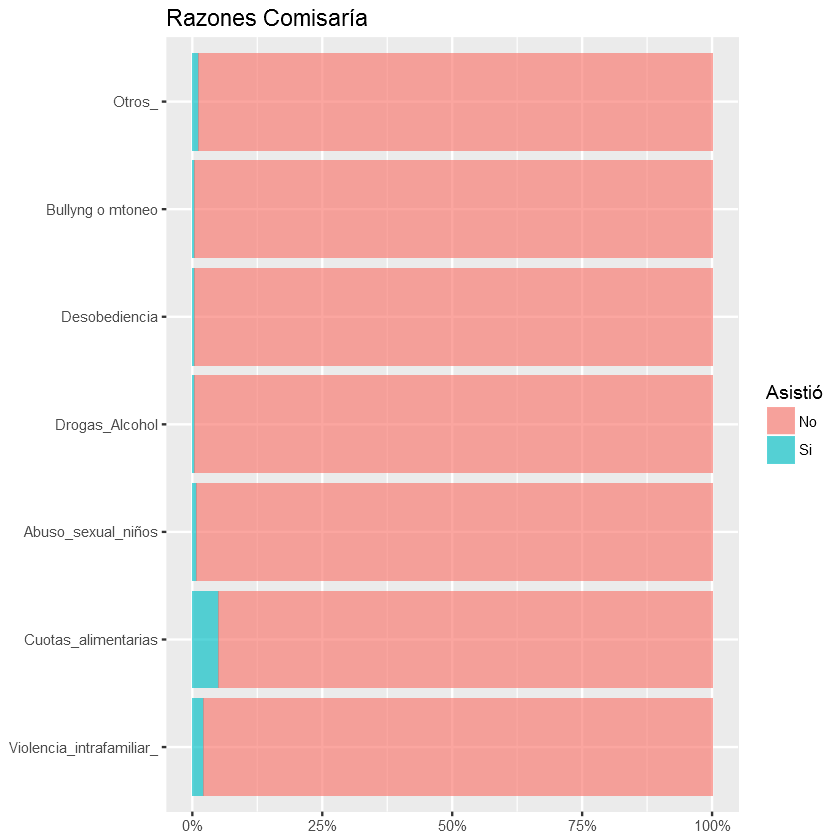

In [14]:
indx=3
agrupar_tablas[indx]

dtbl_cmsr=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cmsr)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cmsr=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#dtbl_cmsr$Otros_=NULL

props_cmsr=NULL
for(i in 1:ncol(dtbl_cmsr)){
    props_cmsr=cbind(props_cmsr,table(dtbl_cmsr[,i]))
}
colnames(props_cmsr)=colnames(dtbl_cmsr)
props_cmsr
prop_cmsr=melt(prop.table(props_cmsr,margin = 2))
prop_cmsr
colnames(prop_cmsr)=c("Asistió","Motivo","Proporción")

ggplot(prop_cmsr,aes(x = Motivo, y=Proporción,fill=Asistió))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Razones Comisaría")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Razones Policía

[1] razones policía
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Violencia_intrafamiliar_,Riñas,Robos,Drogas_Alcohol,Problemas_vecinos
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No
5,No,No,No,No,No
6,No,No,No,No,No


,Violencia_intrafamiliar_,Riñas,Robos,Drogas_Alcohol,Problemas_vecinos
No,238,240,236,239,238
Si,3,1,5,2,3


,Var1,Var2,value
1,No,Violencia_intrafamiliar_,0.987551867219917
2,Si,Violencia_intrafamiliar_,0.012448132780083
3,No,Riñas,0.995850622406639
4,Si,Riñas,0.004149377593361
5,No,Robos,0.979253112033195
6,Si,Robos,0.020746887966805
7,No,Drogas_Alcohol,0.991701244813278
8,Si,Drogas_Alcohol,0.00829875518672199
9,No,Problemas_vecinos,0.987551867219917
10,Si,Problemas_vecinos,0.012448132780083


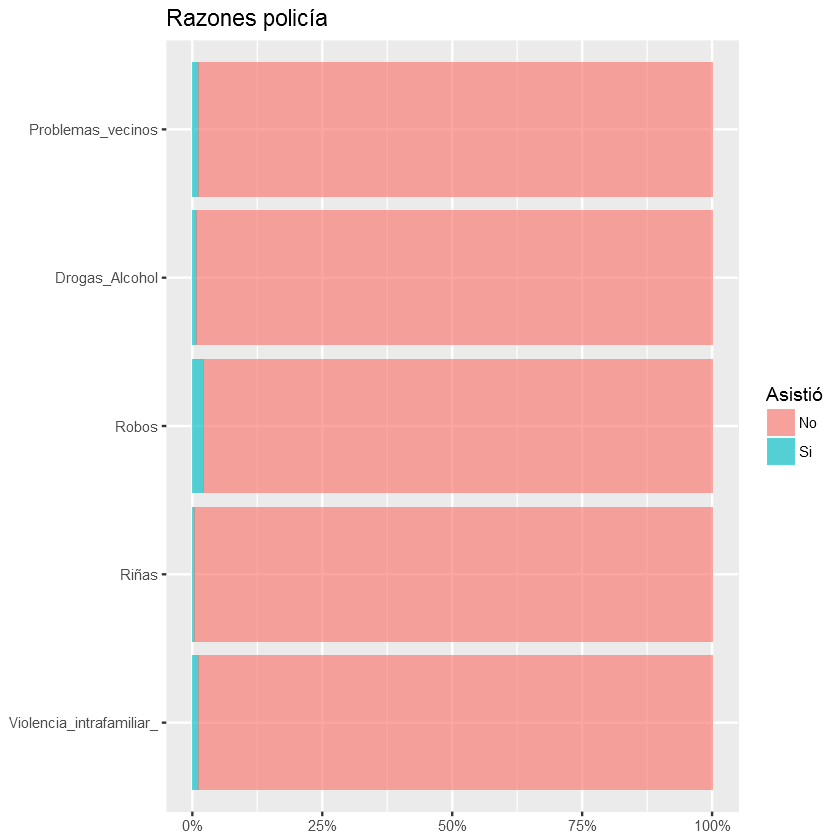

In [15]:
indx=4
agrupar_tablas[indx]

dtbl_polic=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_polic)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_polic=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_polic)

props_polic=NULL
for(i in 1:ncol(dtbl_polic)){
    props_polic=cbind(props_polic,table(dtbl_polic[,i]))
}
colnames(props_polic)=colnames(dtbl_polic)
props_polic
prop_polic=melt(prop.table(props_polic,margin = 2))
prop_polic
colnames(prop_polic)=c("Asistió","Motivo","Proporción")

ggplot(prop_polic,aes(x = Motivo, y=Proporción,fill=Asistió))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Razones policía")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Involucrado en delitos

[1] involucrado en delitos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

[1] servicios                                                                      
 [2] reciben ingresos                                                               
 [3] razones comisaria                                                              
 [4] razones policía                                                                
 [5] involucrado en delitos                                                         
 [6] Promedio de gastos                                                             
 [7] Episodios enfermedad                                                           
 [8] consumo cigarrillo-bebidas                                                     
 [9] tabla consolidada -origen alimentos- con frecuencias y porcentajes             
[10] tabla consolidada -frecuencia consumo alimentos - con frecuencias y porcentajes
[11] Tabla delitos                                                                  
[12] tabla SPA                                                                      
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Pandillas,Barras_bravas,Robos,Vandalismo,Drogas,Alcohol,Prostitución,Sectas,Juego,Abuso_sexual,Otro
1,No,No,No,No,No,No,No,No,No,No,0
2,No,No,No,No,No,No,No,No,No,No,0
3,No,No,No,No,No,No,No,No,No,No,0
4,No,No,No,No,No,No,No,No,No,No,0
5,No,No,No,No,No,No,No,No,No,No,0
6,No,No,No,No,No,No,No,No,No,No,0


,Pandillas,Barras_bravas,Robos,Vandalismo,Drogas,Alcohol,Prostitución,Sectas,Juego,Abuso_sexual,Otro
No,241,241,241,241,238,241,241,241,241,239,241
Si,0,0,0,0,3,0,0,0,0,2,241


,Var1,Var2,value
1,No,Pandillas,1
2,Si,Pandillas,0
3,No,Barras_bravas,1
4,Si,Barras_bravas,0
5,No,Robos,1
6,Si,Robos,0
7,No,Vandalismo,1
8,Si,Vandalismo,0
9,No,Drogas,0.987551867219917
10,Si,Drogas,0.012448132780083


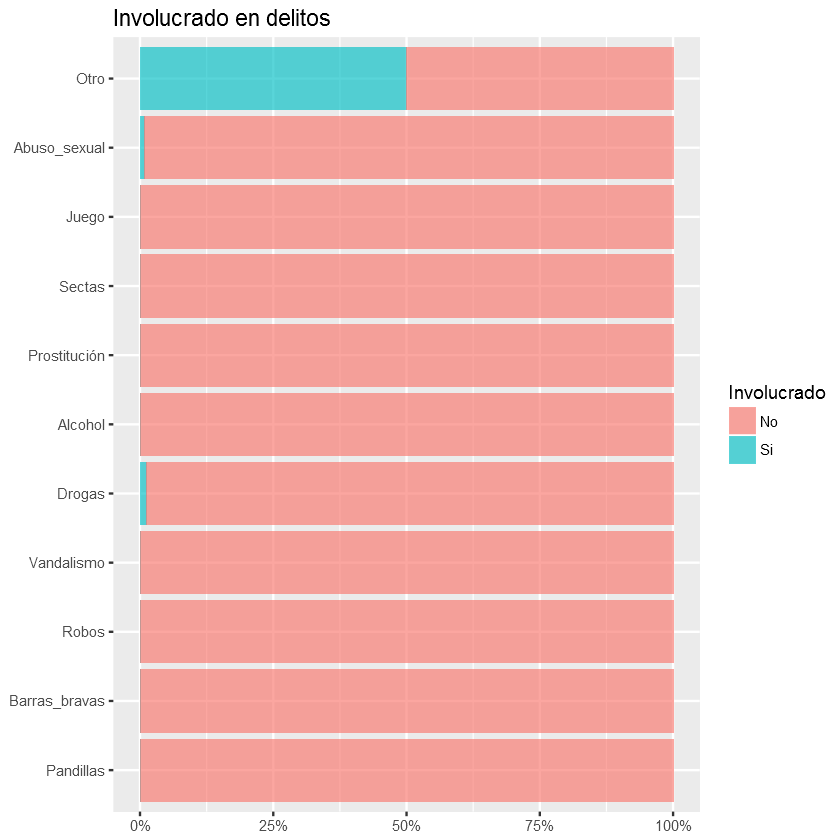

In [16]:
indx=5
agrupar_tablas[indx]
agrupar_tablas

dtbl_delits=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_delits)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_delits=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_delits)

props_delits=NULL
for(i in 1:ncol(dtbl_delits)){
    props_delits=cbind(props_delits,table(dtbl_delits[,i]))
}
colnames(props_delits)=colnames(dtbl_delits)
props_delits
prop_delits=melt(prop.table(props_delits,margin = 2))
prop_delits
colnames(prop_delits)=c("Involucrado","Delito","Proporción")

ggplot(prop_delits,aes(x = Delito, y=Proporción,fill=Involucrado))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Involucrado en delitos")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Promedio de gastos

[1] Promedio de gastos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Fuente,Promedio
6,Mercado_hogar_carnes_lácteos_etc_,271533.609958506
1,Arriendo,239792.531120332
3,Servicios_públicos_agua_luz_etc_,129523.319502075
13,Préstamos_bancarios_,102807.468879668
11,Vestuario_zapatos_ropa_familia_,101058.091286307
8,Educación_jardines_y_cuidador_hijo_,95684.6473029046
10,Transporte_personal_,53831.5352697095
5,Actividades_culturales_y_o_de_esparcimiento_grupo_familiar_,47551.867219917
7,Salud_,35524.6887966805
2,Cuota_vivienda,27917.0124481328


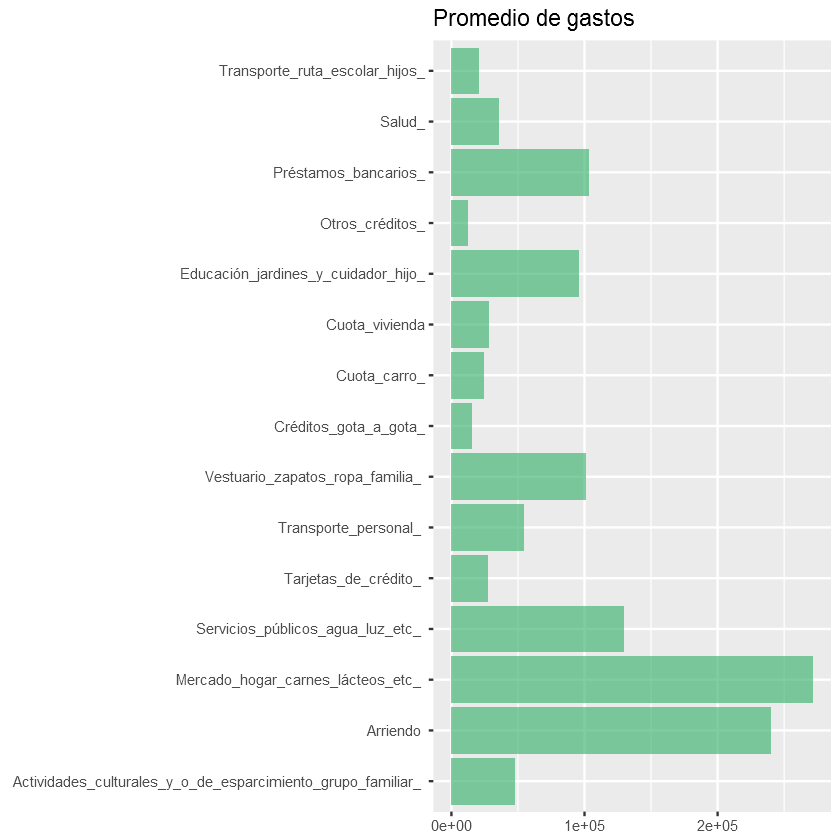

In [17]:
indx=6
agrupar_tablas[indx]

dtbl_gasts=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
#dtbl_gasts/data$X46#Ingresos declarados
colnames(dtbl_gasts)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_gasts=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]

gastsss_prom=data.frame(colMeans(dtbl_gasts))
colnames(gastsss_prom)="Promedio"
gastsss_prom=data.frame(Fuente=rownames(gastsss_prom),Promedio=gastsss_prom$Promedio)
gastsss_prom=gastsss_prom[order(-gastsss_prom$Promedio),]
gastsss_prom

ggplot(gastsss_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de gastos")
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Enfermedad

In [18]:
indx=7
agrupar_tablas[indx]

[1] Episodios enfermedad
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

[1] Episodios enfermedad
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Diarrea,Gripa,Vómito,Eruptivas,Problemas_de_piel,Alergias,Desnutrición,Infecciones,Fracturas,Golpes,Heridas_graves,Otra
1,No,No,No,No,No,No,No,No,No,No,No,No
2,No,Si,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No,No,No,No


,Diarrea,Gripa,Vómito,Eruptivas,Problemas_de_piel,Alergias,Desnutrición,Infecciones,Fracturas,Golpes,Heridas_graves,Otra
No,213,163,220,240,230,230,238,236,240,234,240,235
Si,26,65,19,1,10,10,3,5,1,4,1,6


,Presentó,Enfermedad,Proporción
1,No,Diarrea,0.891213389121339
2,Si,Diarrea,0.108786610878661
3,No,Gripa,0.714912280701754
4,Si,Gripa,0.285087719298246
5,No,Vómito,0.920502092050209
6,Si,Vómito,0.0794979079497908
7,No,Eruptivas,0.995850622406639
8,Si,Eruptivas,0.004149377593361
9,No,Problemas_de_piel,0.958333333333333
10,Si,Problemas_de_piel,0.0416666666666667


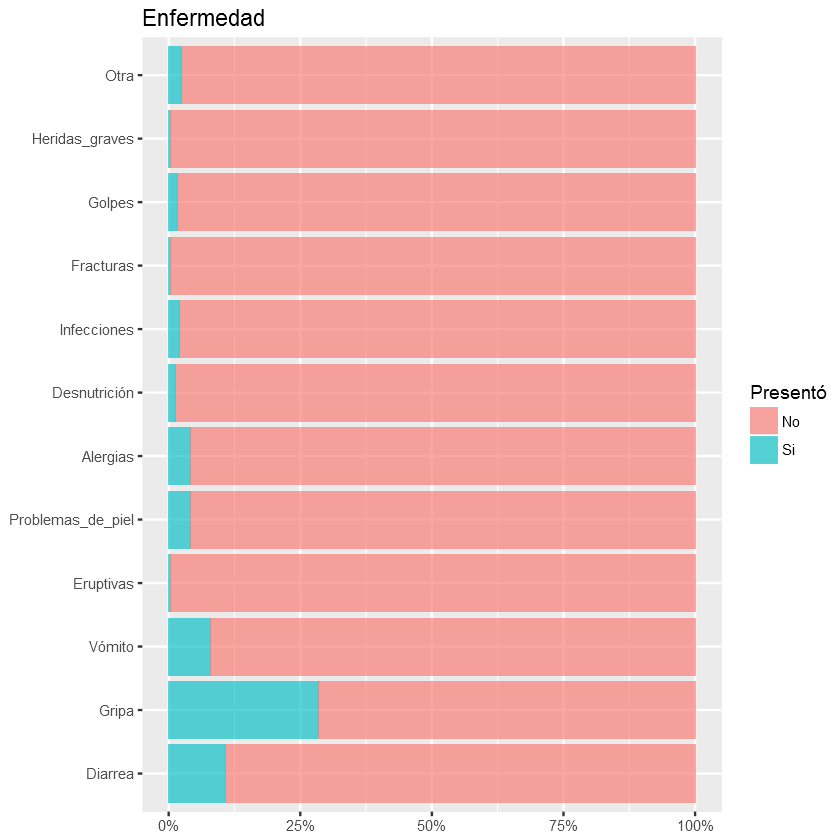

In [19]:
indx=7
agrupar_tablas[indx]

dtbl_enferm=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_enferm)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_enferm=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_enferm)

props_enferm=NULL
for(i in 1:ncol(dtbl_enferm)){
    props_enferm=cbind(props_enferm,table(dtbl_enferm[,i]))
}
colnames(props_enferm)=colnames(dtbl_enferm)
props_enferm
prop_enferm=melt(prop.table(props_enferm,margin = 2))
colnames(prop_enferm)=c("Presentó","Enfermedad","Proporción")
prop_enferm

ggplot(prop_enferm,aes(x = Enfermedad, y=Proporción,fill=Presentó))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Enfermedad")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Cigarrillo y bebidas

In [20]:
indx=8
agrupar_tablas[indx]

[1] consumo cigarrillo-bebidas
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

[1] consumo cigarrillo-bebidas
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,SI_NO,Número_de_cigarrillos_al_día_,SI_NO,Número_de_veces_al_mes_
1,No,0,No,0
2,Si,1,No,0
3,No,0,No,0
4,Si,3,No,0
5,No,0,Si,0
6,No,0,No,0


,Fuma,Bebid_alch
No reporta,3,4
Si,22,47
No,216,190


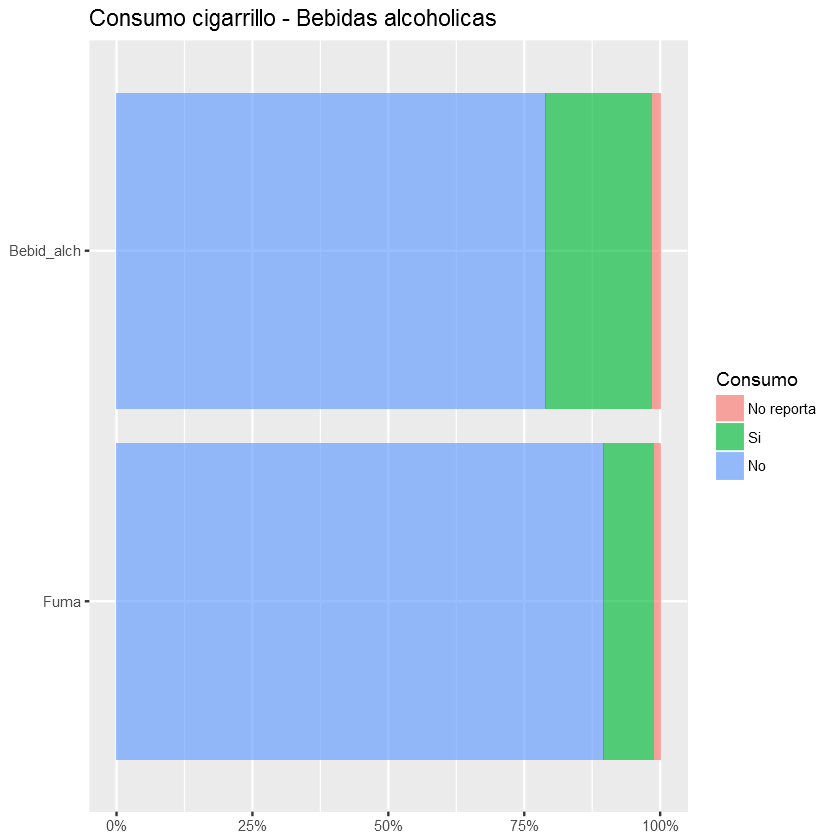

In [21]:
indx=8
agrupar_tablas[indx]

dtbl_cig_beb=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cig_beb)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cig_beb=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_cig_beb)

cig_beb_cons=data.frame(Fuma=dtbl_cig_beb[,1],Bebid_alch=dtbl_cig_beb[,3])
#head(cig_beb_cons)

props_cig_beb_cons=NULL
for(i in 1:ncol(cig_beb_cons)){
    props_cig_beb_cons=cbind(props_cig_beb_cons,table(cig_beb_cons[,i]))
}
colnames(props_cig_beb_cons)=colnames(cig_beb_cons)
props_cig_beb_cons
prop_cig_beb_cons=melt(prop.table(props_cig_beb_cons,margin = 2))
colnames(prop_cig_beb_cons)=c("Consumo","Tipo","Proporción")
#prop_cig_beb_cons

ggplot(prop_cig_beb_cons,aes(x = Tipo, y=Proporción,fill=Consumo))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo cigarrillo - Bebidas alcoholicas")+
coord_flip()
ggsave(paste("Consumo cigarrillo - Bebidas alcoholicas",".jpeg"), width = size_pic_w, height = size_pic_h)

,Consumo,Promedio
1,Fuma,2.66666666666667
2,Alcohol,1.8695652173913


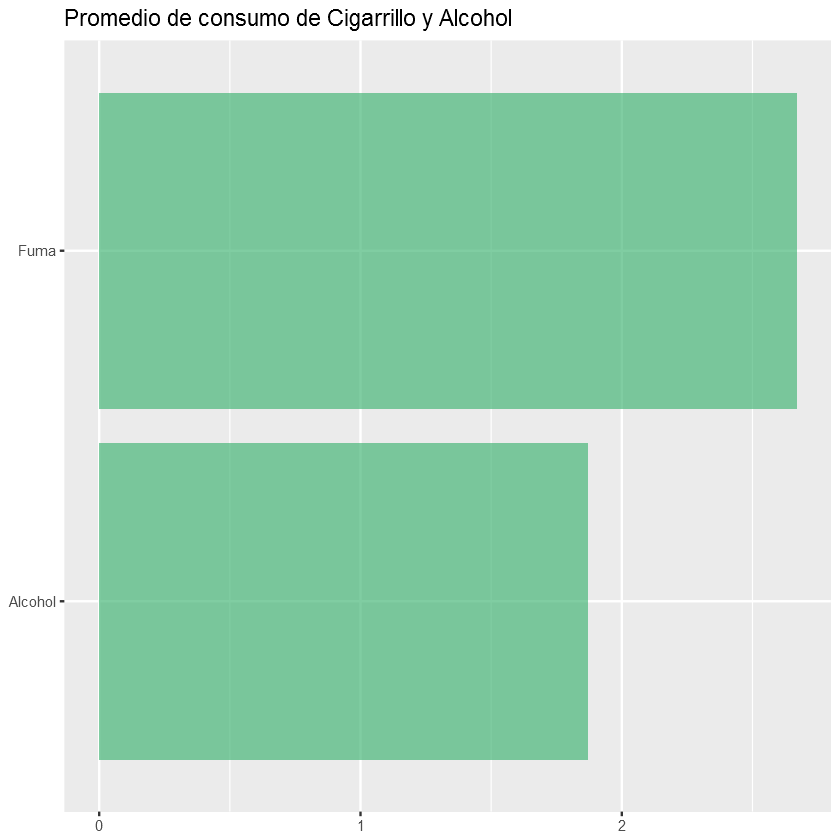

In [22]:
Fuma_freq=dtbl_cig_beb[dtbl_cig_beb[,1]=="Si",2]
Bebid_alch_freq=dtbl_cig_beb[dtbl_cig_beb[,3]=="Si",4]
fum_alch_prom=data.frame(Consumo=c("Fuma","Alcohol"),Promedio=c(mean(Fuma_freq[Fuma_freq>0]),mean(Bebid_alch_freq[Bebid_alch_freq>0])))
fum_alch_prom

ggplot(fum_alch_prom,aes(x=Consumo,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de consumo de Cigarrillo y Alcohol")
ggsave(paste("Promedio de consumo de Cigarrillo y Alcohol",".jpeg"), width = size_pic_w, height = size_pic_h)

## Origen alimentos

In [23]:
indx=9
agrupar_tablas[indx]

[1] tabla consolidada -origen alimentos- con frecuencias y porcentajes
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [24]:
dtbl_orig_alim=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_orig_alim)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_orig_alim=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_orig_alim)

,Producción,Compra,Donación,Trueque,Sobras
1,Pequeña parte,Mayor parte,Nada,Nada,Nada
2,Nada,Mayor parte,Nada,Nada,Nada
3,Nada,Mayor parte,Nada,Nada,Nada
4,Pequeña parte,Mayor parte,Nada,Nada,Nada
5,Nada,Mayor parte,Nada,Nada,Nada
6,Mayor parte,Pequeña parte,Nada,Nada,Nada


,Producción,Compra,Donación,Trueque,Sobras
No reporta,48,7,46,52,51
Mayor parte,39,196,10,3,1
Pequeña parte,21,23,16,11,3
Nada,133,15,169,175,186


,Parte,Origen,Proporción
1,No reporta,Producción,0.199170124481328
2,Mayor parte,Producción,0.161825726141079
3,Pequeña parte,Producción,0.0871369294605809
4,Nada,Producción,0.551867219917012
5,No reporta,Compra,0.029045643153527
6,Mayor parte,Compra,0.813278008298755
7,Pequeña parte,Compra,0.0954356846473029
8,Nada,Compra,0.0622406639004149
9,No reporta,Donación,0.190871369294606
10,Mayor parte,Donación,0.04149377593361


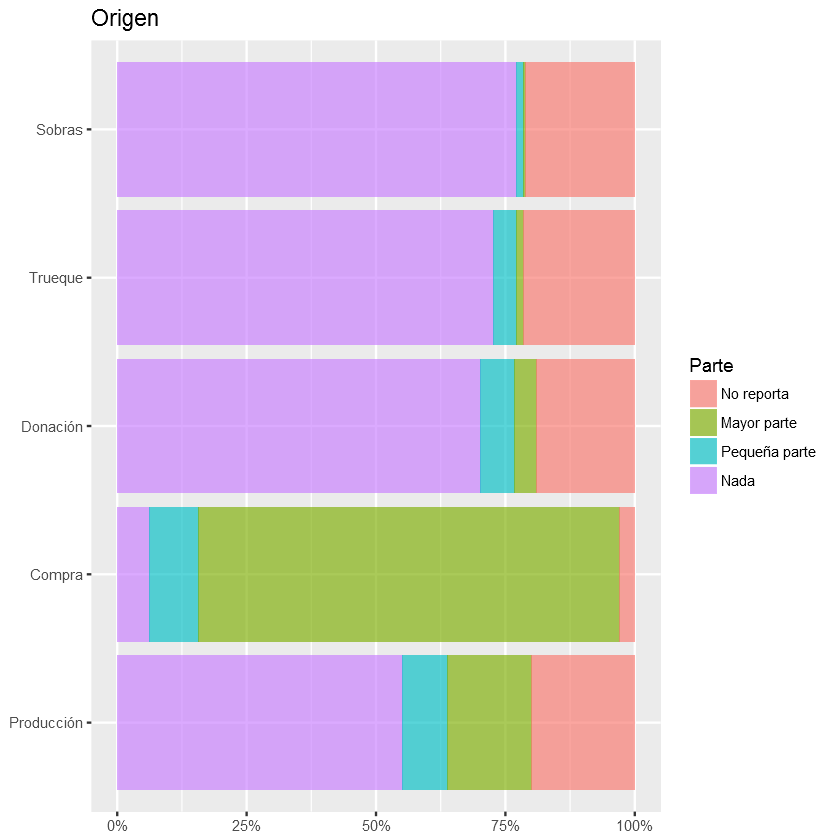

In [25]:
props_orig_alim=NULL
for(i in 1:ncol(dtbl_orig_alim)){
    props_orig_alim=cbind(props_orig_alim,table(dtbl_orig_alim[,i]))
}
colnames(props_orig_alim)=colnames(dtbl_orig_alim)
props_orig_alim
prop_orig_alim=melt(prop.table(props_orig_alim,margin = 2))
colnames(prop_orig_alim)=c("Parte","Origen","Proporción")
prop_orig_alim

ggplot(prop_orig_alim,aes(x = Origen, y=Proporción,fill=Parte))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Origen")+
coord_flip()
ggsave(paste("Origen alimentos",".jpeg"), width = size_pic_w, height = size_pic_h)

## Frecuencia consumo alimentos

In [26]:
indx=10
agrupar_tablas[indx]

[1] tabla consolidada -frecuencia consumo alimentos - con frecuencias y porcentajes
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [27]:
dtbl_cons_alim=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cons_alim)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cons_alim=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_cons_alim)

,Cereales,Harinas,Lacteos,Panela,Huevo,Carnes,Leguminosas,Hortalizas verduras,Frutas,Otros
1,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta
2,Diaria,Diaria,Semanal,Mensual,Diaria,Semanal,Semanal,Semanal,Semanal,No reporta
3,Diaria,Diaria,Diaria,Diaria,Diaria,Semanal,Semanal,Diaria,Diaria,No reporta
4,Mensual,Diaria,Diaria,Semanal,Diaria,Semanal,Diaria,Semanal,Diaria,Diaria
5,Diaria,Diaria,Diaria,Semanal,Semanal,Diaria,Semanal,Semanal,Diaria,Semanal
6,Diaria,Diaria,Diaria,Semanal,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria


,Cereales,Harinas,Lacteos,Panela,Huevo,Carnes,Leguminosas,Hortalizas verduras,Frutas,Otros
No reporta,9,7,5,7,1,3,18,7,7,141
Diaria,175,188,155,140,124,107,96,105,98,33
Semanal,38,41,62,68,105,104,107,106,99,24
Mensual,19,5,19,26,11,27,20,23,37,43


,Frecuencia,Alimento,Proporción
1,No reporta,Cereales,0.037344398340249
2,Diaria,Cereales,0.726141078838174
3,Semanal,Cereales,0.157676348547718
4,Mensual,Cereales,0.0788381742738589
5,No reporta,Harinas,0.029045643153527
6,Diaria,Harinas,0.780082987551867
7,Semanal,Harinas,0.170124481327801
8,Mensual,Harinas,0.020746887966805
9,No reporta,Lacteos,0.020746887966805
10,Diaria,Lacteos,0.643153526970954


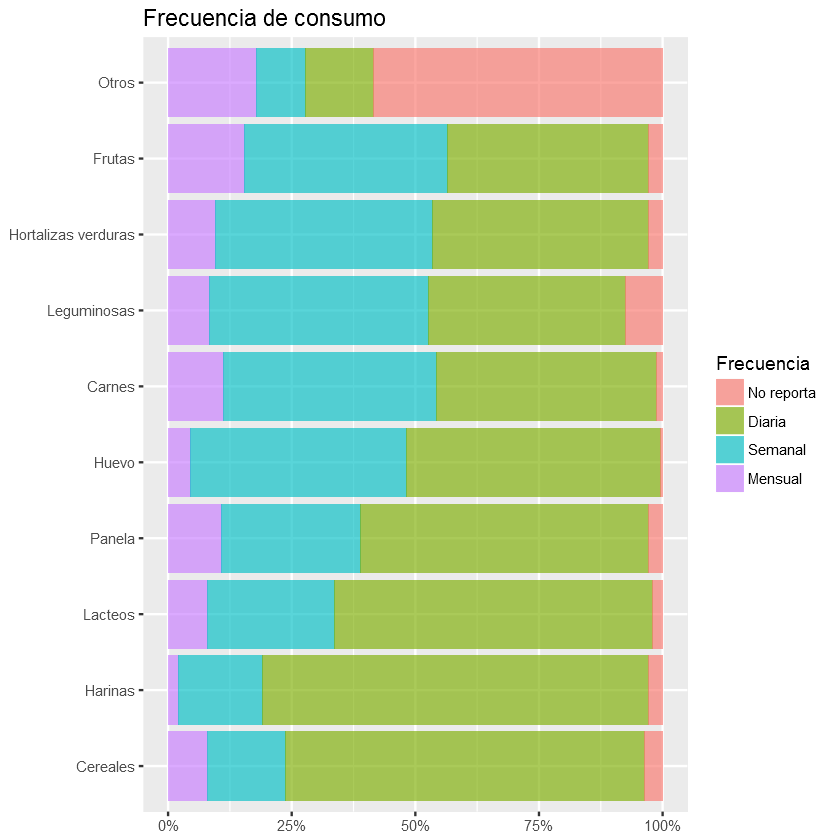

In [28]:
props_cons_alim=NULL
for(i in 1:ncol(dtbl_cons_alim)){
    props_cons_alim=cbind(props_cons_alim,table(dtbl_cons_alim[,i]))
}
colnames(props_cons_alim)=colnames(dtbl_cons_alim)
props_cons_alim
prop_cons_alim=melt(prop.table(props_cons_alim,margin = 2))
colnames(prop_cons_alim)=c("Frecuencia","Alimento","Proporción")
prop_cons_alim

ggplot(prop_cons_alim,aes(x = Alimento, y=Proporción,fill=Frecuencia))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Frecuencia de consumo")+
coord_flip()
ggsave(paste("frecuencia consumo",".jpeg"), width = size_pic_w, height = size_pic_h)

## Delitos

In [29]:
indx=11
agrupar_tablas[indx]

[1] Tabla delitos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [30]:
dtbl_delits=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_delits)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_delits=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_delits)


,Número_de_veces,Quién_de_la_familia,Denunció,Número_de_veces.1,Quién_de_la_familia.1,Denunció.1,Número_de_veces.2,Quién_de_la_familia.2,Denunció.2,Número_de_veces.3,...,Denunció,Número_de_veces,Quién_de_la_familia,Denunció.1,Número_de_veces.1,Quién_de_la_familia.1,Denunció.2,Número_de_veces.2,Quién_de_la_familia.2,Denunció.3
1,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta
2,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta
3,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta
4,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta
5,0,NA,No reporta,1,Padres,Si,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta
6,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta,0,...,No reporta,0,NA,No reporta,0,NA,No reporta,0,NA,No reporta


,Fuente,Promedio
11,Bullying o matoneo,0.298755186721992
1,Robo residencia,0.161825726141079
4,Cosquilleo,0.145228215767635
2,Atraco arma blanca,0.141078838174274
10,Calumnias e injurias,0.141078838174274
5,Amenazas,0.120331950207469
8,Agresión física,0.120331950207469
15,Estafa,0.04149377593361
6,Robo vehículo,0.024896265560166
7,Violación,0.024896265560166


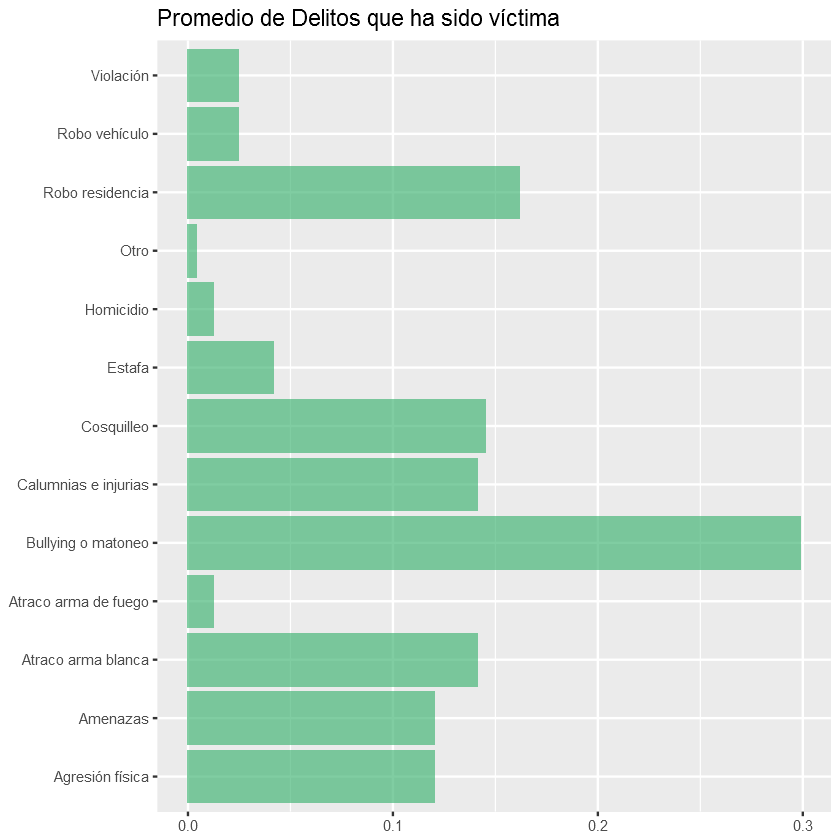

In [31]:
num_veces_df=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[1]]
colnames(num_veces_df)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[1]]

num_veces_prom=data.frame(colMeans(num_veces_df))
colnames(num_veces_prom)="Promedio"
num_vecess_prom=data.frame(Fuente=rownames(num_veces_prom),Promedio=num_veces_prom$Promedio)
num_vecess_prom=num_vecess_prom[num_vecess_prom$Promedio>0,]
num_vecess_prom=num_vecess_prom[order(-num_vecess_prom$Promedio),]
num_vecess_prom

ggplot(num_vecess_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de Delitos que ha sido víctima")
ggsave(paste("Promedio de Delitos que ha sido víctima",".jpeg"), width = size_pic_w, height = size_pic_h)

,Robo residencia,Atraco arma blanca,Atraco arma de fuego,Cosquilleo,Amenazas,Robo vehículo,Violación,Agresión física,Calumnias e injurias,Bullying o matoneo,Homicidio,Estafa,Otro
Esposos-pareja,3,0,0,0,2,1,0,0,0,0,0,0,0
Hijos,3,5,1,4,1,1,2,1,1,6,2,0,0
Padres,2,3,0,5,2,1,0,0,0,0,0,1,0
Nietos,1,0,0,0,0,0,1,0,0,0,0,0,0
Cuñados,0,1,0,0,0,0,0,0,0,0,0,0,0
Primos,1,0,0,0,0,0,1,0,0,0,0,0,0
Hermanos,2,0,0,0,0,0,0,0,1,0,0,0,0
encuestado,10,15,2,12,7,2,0,6,9,4,0,6,0
Núcleo familiar,5,0,0,0,0,0,0,1,1,2,0,1,1
Ex - esposo,0,0,0,0,1,0,0,1,0,0,0,0,0


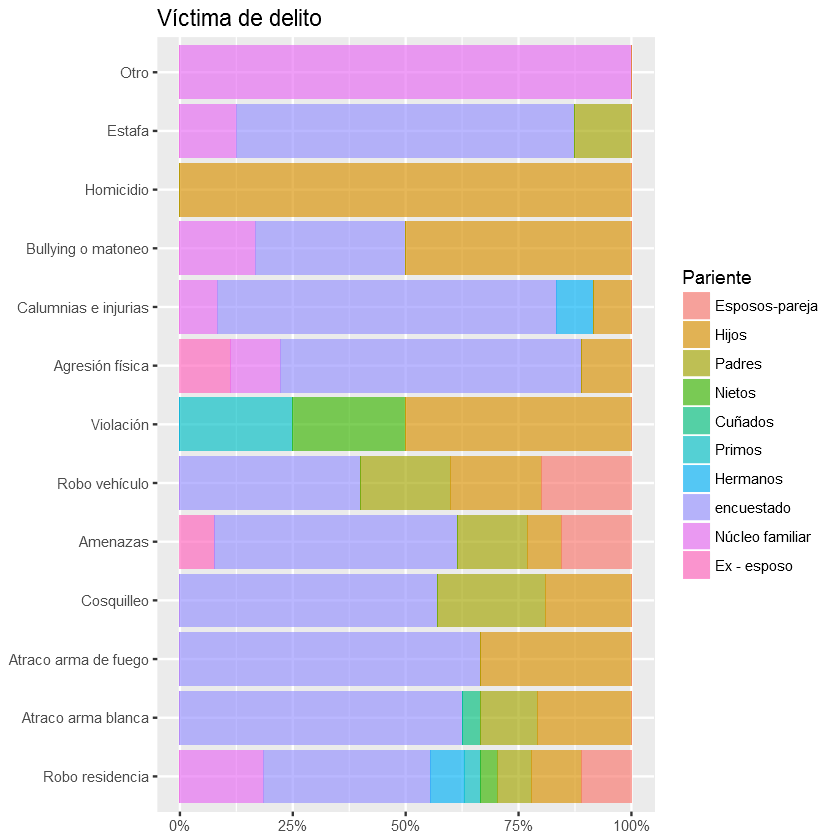

In [32]:
qn_fmlia=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[2]]
colnames(qn_fmlia)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[2]]

props_qn_fmlia=NULL
for(i in 1:ncol(qn_fmlia)){
    props_qn_fmlia=cbind(props_qn_fmlia,table(qn_fmlia[,i]))
}
colnames(props_qn_fmlia)=colnames(qn_fmlia)
props_qn_fmlia=props_qn_fmlia[rowSums(props_qn_fmlia)>0,]
props_qn_fmlia=props_qn_fmlia[,colSums(props_qn_fmlia)>0]
props_qn_fmlia
prop_qn_fmlia=melt(prop.table(props_qn_fmlia,margin = 2))
colnames(prop_qn_fmlia)=c("Pariente","Delito","Proporción")


ggplot(prop_qn_fmlia,aes(x = Delito, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Víctima de delito")+
coord_flip()
ggsave(paste("Víctima de delito",".jpeg"), width = size_pic_w, height = size_pic_h)

,Robo residencia,Atraco arma blanca,Atraco arma de fuego,Cosquilleo,Amenazas,Robo vehículo,Violación,Agresión física,Extorsión,Calumnias e injurias,Bullying o matoneo,Ataques de pandillas o barras bravas,Homicidio,Desaparición forzada,Estafa,Otro
Si,17,14,2,13,10,2,4,10,0,9,7,1,3,0,5,1
No,10,13,1,10,4,1,0,2,1,6,6,1,1,1,4,2


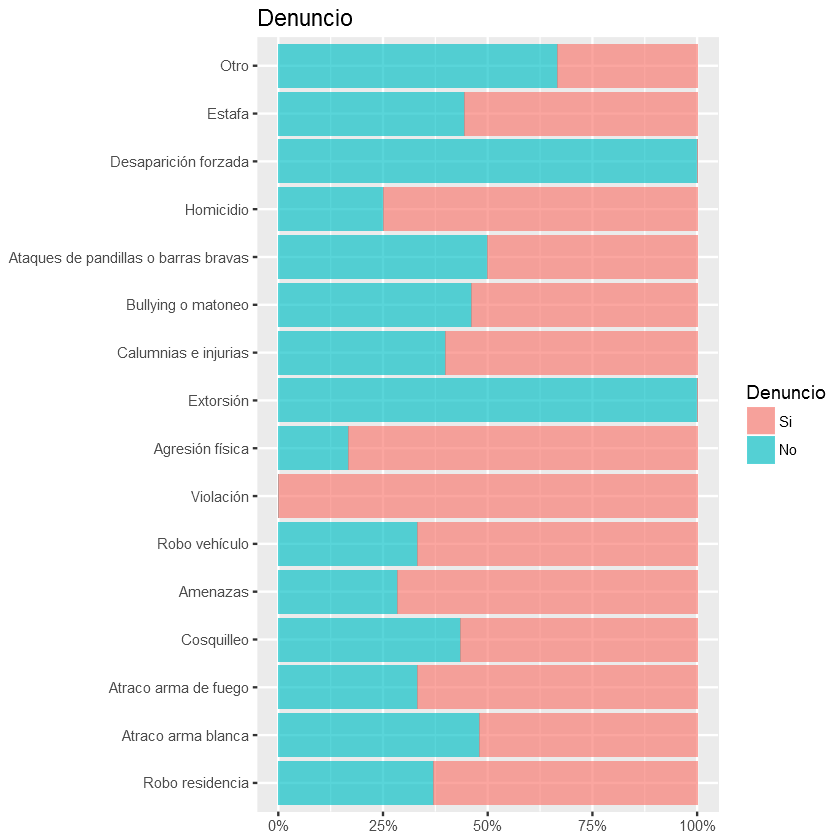

In [33]:
denuncio=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[3]]
colnames(denuncio)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[3]]

props_denuncio=NULL
for(i in 1:ncol(denuncio)){
    props_denuncio=cbind(props_denuncio,table(denuncio[,i]))
}
colnames(props_denuncio)=colnames(denuncio)
#props_denuncio=props_denuncio[rowSums(props_denuncio)>0,]
#props_denuncio=props_denuncio[,colSums(props_denuncio)>0]
props_denuncio[2:3,]
prop_denuncio=melt(prop.table(props_denuncio[2:3,],margin = 2))
colnames(prop_denuncio)=c("Denuncio","Delito","Proporción")


ggplot(prop_denuncio,aes(x = Delito, y=Proporción,fill=Denuncio))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Denuncio")+
coord_flip()
ggsave(paste("Denuncio",".jpeg"), width = size_pic_w, height = size_pic_h)

## Consumo SPA

In [34]:
indx=12
agrupar_tablas[indx]

[1] tabla SPA
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [35]:
dtbl_SPA=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_SPA)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_SPA=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
head(dtbl_SPA,n = 15)

,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted.1,Quién_de_la_familia.1,HIJO_A_U_OTRO_MIEMBRO.1,...,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar.1,Severidad usted.1,Severidad familar.1
1,Nunca,Esposos-pareja,Nunca,0,0,0,0,Nunca,Esposos-pareja,Nunca,...,0,0,0,Nunca,Esposos-pareja,Nunca,0,0,0,0
2,Rara vez,Esposos-pareja,No reporta,0,0,0,0,Nunca,NA,No reporta,...,0,0,0,Rara vez,NA,No reporta,0,0,1,0
3,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Rara vez,NA,Nunca,0,0,1,0
4,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
5,Rara vez,NA,Nunca,0,0,1,0,Rara vez,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
6,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
7,Nunca,NA,No reporta,0,0,0,0,Nunca,NA,No reporta,...,0,0,0,Nunca,NA,No reporta,0,0,0,0
8,Nunca,NA,No reporta,0,0,0,0,Nunca,NA,No reporta,...,0,0,0,Nunca,NA,No reporta,0,0,0,0
9,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
10,Rara vez,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,A veces,NA,Nunca,0,0,2,0


In [36]:
unique(vars_SPA$React)
unique(vars_SPA$Escala)

[1] Usted                        Quién_de_la_familia         
[3] HIJO_A_U_OTRO_MIEMBRO        Desde cuando (años) usted   
[5] Desde cuando (años) familiar Severidad usted             
[7] Severidad familar           
217 Levels:  Actividades_culturales_y_o_de_esparcimiento_grupo_familiar_  ...

[1] CONSUMO CERVEZA TRAGO           MARIHUANA       COCAINA        
 [5] EXTASIS         BAZUCO          OTRAS DROGAS    INHALANTES     
 [9] OXIDO NITROSO   PEPAS           CIGARRILLOS    
69 Levels:  43. En la siguiente lista de gastos por favor indique cuánto dinero en pesos colombianos invierte mensualmente en su hogar.  ...

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
2,Rara vez,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Rara vez
3,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Rara vez
4,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
5,Rara vez,Rara vez,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
6,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca


,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
No reporta,35,42,41,42,43,42,42,42,42,42,42
Nunca,121,155,197,199,198,199,199,199,199,199,179
Rara vez,56,31,2,0,0,0,0,0,0,0,7
A veces,25,13,1,0,0,0,0,0,0,0,7
Frecuente,4,0,0,0,0,0,0,0,0,0,6


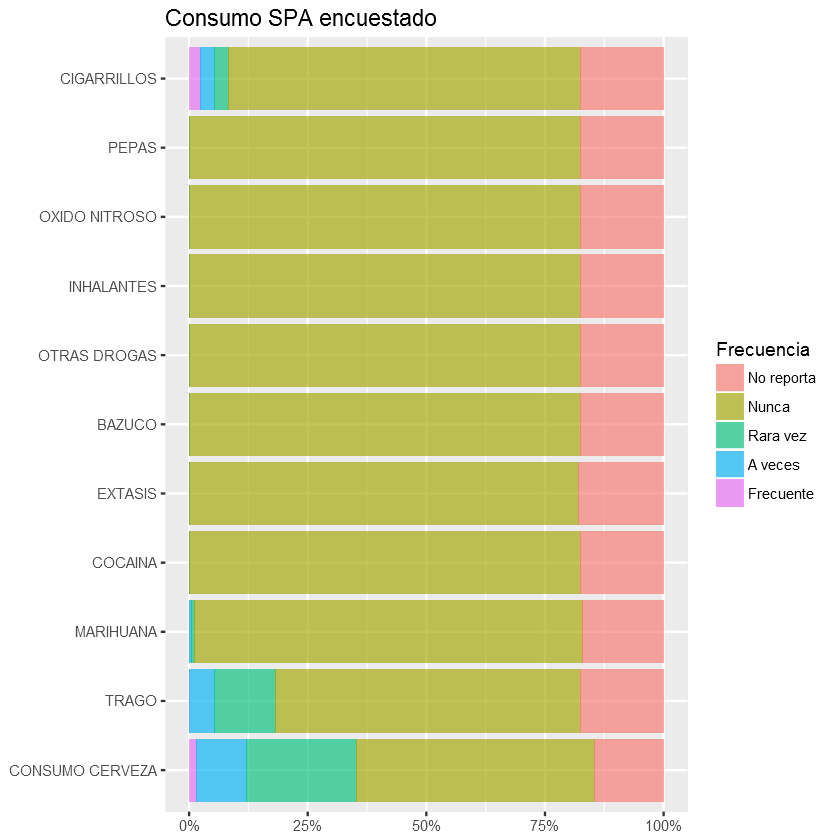

In [37]:
SPA_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[1]]
colnames(SPA_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[1]]
head(SPA_encuestado)


props_SPA_encuestado=NULL
for(i in 1:ncol(SPA_encuestado)){
    props_SPA_encuestado=cbind(props_SPA_encuestado,table(SPA_encuestado[,i]))
}
colnames(props_SPA_encuestado)=colnames(SPA_encuestado)
props_SPA_encuestado=props_SPA_encuestado[rowSums(props_SPA_encuestado)>0,]
props_SPA_encuestado=props_SPA_encuestado[,colSums(props_SPA_encuestado)>0]
props_SPA_encuestado
prop_SPA_encuestado=melt(prop.table(props_SPA_encuestado,margin = 2))
colnames(prop_SPA_encuestado)=c("Frecuencia","Sustancia","Proporción")

ggplot(prop_SPA_encuestado,aes(x = Sustancia, y=Proporción,fill=Frecuencia))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo SPA encuestado")+
coord_flip()
ggsave(paste("Consumo SPA encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja,Esposos-pareja
2,Esposos-pareja,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
Esposos-pareja,6,3,2,1,1,1,1,1,1,1,2
Hijos,3,1,2,0,0,0,0,0,0,0,2
Padres,1,0,0,0,0,0,0,0,0,0,2
Sobrinos,1,1,1,0,0,0,0,0,0,0,0
Tios,2,2,0,0,0,0,0,0,0,0,1
Hermanos,5,4,0,0,0,0,0,0,0,0,3
Hijastros,1,1,0,0,0,0,0,0,0,0,0
Otro familiar,22,20,3,0,0,0,0,0,0,0,7


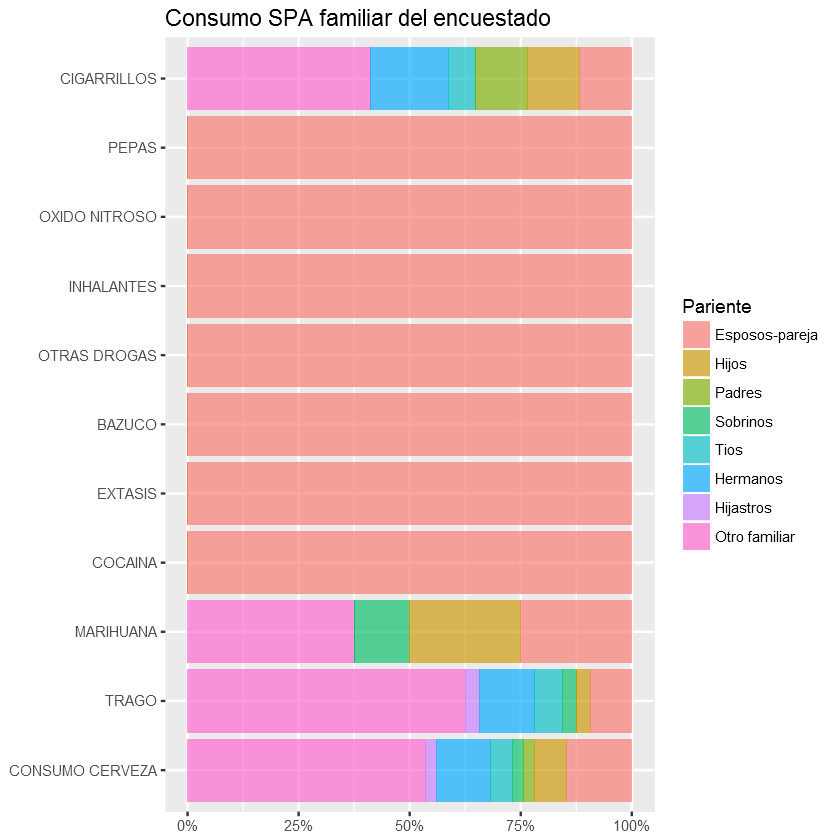

In [38]:
SPA_familiar=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[2]]
colnames(SPA_familiar)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[2]]
head(SPA_familiar)

props_SPA_familiar=NULL
for(i in 1:ncol(SPA_familiar)){
    props_SPA_familiar=cbind(props_SPA_familiar,table(SPA_familiar[,i]))
}
colnames(props_SPA_familiar)=colnames(SPA_familiar)
props_SPA_familiar=props_SPA_familiar[rowSums(props_SPA_familiar)>0,]
props_SPA_familiar=props_SPA_familiar[,colSums(props_SPA_familiar)>0]
props_SPA_familiar
prop_SPA_familiar=melt(prop.table(props_SPA_familiar,margin = 2))
colnames(prop_SPA_familiar)=c("Pariente","Sustancia","Proporción")

ggplot(prop_SPA_familiar,aes(x = Sustancia, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo SPA familiar del encuestado")+
coord_flip()
ggsave(paste("Consumo SPA familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
2,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta
3,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
4,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
5,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca
6,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca


,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
No reporta,72,71,71,72,73,71,73,71,73,73,71
Nunca,93,116,161,168,168,167,168,169,168,168,137
Rara vez,37,30,1,1,0,0,0,1,0,0,8
A veces,27,16,1,0,0,3,0,0,0,0,11
Frecuente,12,8,7,0,0,0,0,0,0,0,14


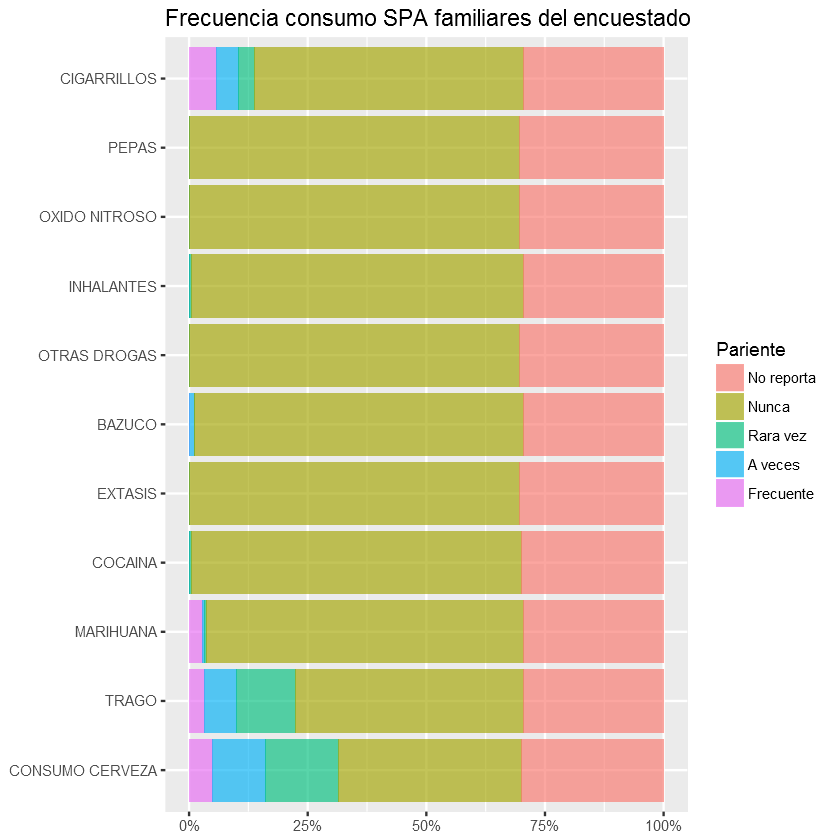

In [39]:
SPA_otro_familiar=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[3]]
colnames(SPA_otro_familiar)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[3]]
head(SPA_otro_familiar)

props_SPA_otro_familiar=NULL
for(i in 1:ncol(SPA_otro_familiar)){
    props_SPA_otro_familiar=cbind(props_SPA_otro_familiar,table(SPA_otro_familiar[,i]))
}
colnames(props_SPA_otro_familiar)=colnames(SPA_otro_familiar)
props_SPA_otro_familiar=props_SPA_otro_familiar[rowSums(props_SPA_otro_familiar)>0,]
props_SPA_otro_familiar=props_SPA_otro_familiar[,colSums(props_SPA_otro_familiar)>0]
props_SPA_otro_familiar
prop_SPA_otro_familiar=melt(prop.table(props_SPA_otro_familiar,margin = 2))
colnames(prop_SPA_otro_familiar)=c("Pariente","Sustancia","Proporción")

ggplot(prop_SPA_otro_familiar,aes(x = Sustancia, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Frecuencia consumo SPA familiares del encuestado")+
coord_flip()
ggsave(paste("Frecuencia consumo SPA familiares del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)


,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0


,Fuente,Promedio
1,CONSUMO CERVEZA,4.19502074688797
2,TRAGO,1.74273858921162
11,CIGARRILLOS,1.49377593360996
3,MARIHUANA,0.129322268327801
8,INHALANTES,0.016597510373444


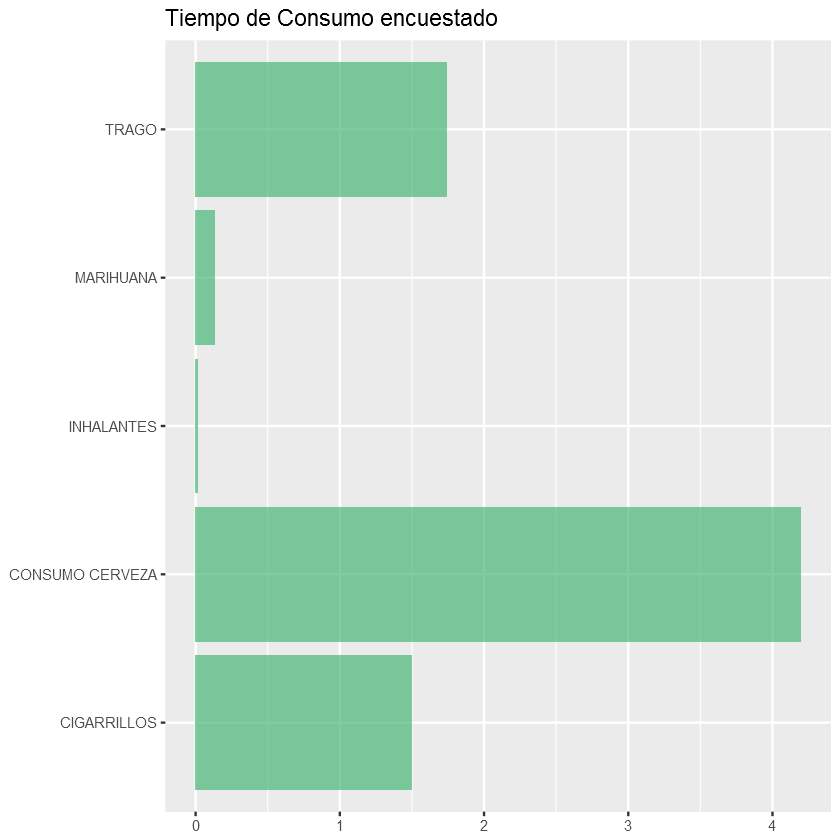

In [40]:
SPA_tiempo_consumo_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[4]]
colnames(SPA_tiempo_consumo_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[4]]
head(SPA_tiempo_consumo_encuestado)

tiempo_consumo_encuestado_prom=data.frame(colMeans(SPA_tiempo_consumo_encuestado))
colnames(tiempo_consumo_encuestado_prom)="Promedio"
tiempo_consumo_encuestados_prom=data.frame(Fuente=rownames(tiempo_consumo_encuestado_prom),Promedio=tiempo_consumo_encuestado_prom$Promedio)
tiempo_consumo_encuestados_prom=tiempo_consumo_encuestados_prom[tiempo_consumo_encuestados_prom$Promedio>0,]
tiempo_consumo_encuestados_prom=tiempo_consumo_encuestados_prom[order(-tiempo_consumo_encuestados_prom$Promedio),]
tiempo_consumo_encuestados_prom

ggplot(tiempo_consumo_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Tiempo de Consumo encuestado")
ggsave(paste("Tiempo de Consumo encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0


,Fuente,Promedio
1,CONSUMO CERVEZA,4.18257261410788
2,TRAGO,2.36929460580913
11,CIGARRILLOS,1.61825726141079
3,MARIHUANA,0.327800829875519
6,BAZUCO,0.182572614107884
8,INHALANTES,0.178423236514523


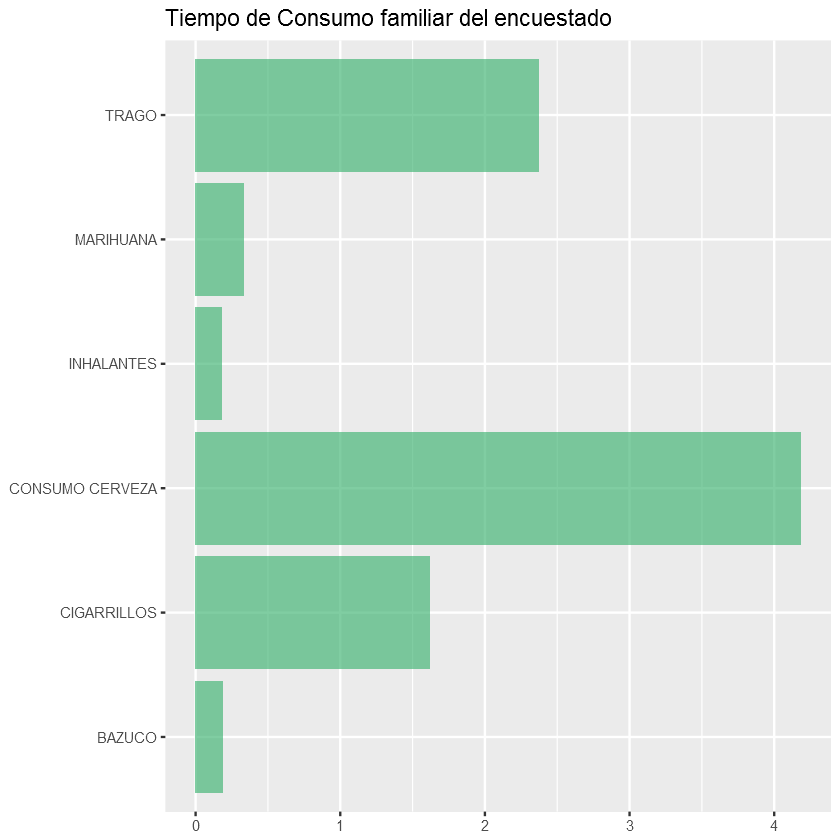

In [41]:
SPA_tiempo_consumo_familiar_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[5]]
colnames(SPA_tiempo_consumo_familiar_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[5]]
head(SPA_tiempo_consumo_familiar_encuestado)

tiempo_consumo_familiar_encuestado_prom=data.frame(colMeans(SPA_tiempo_consumo_familiar_encuestado))
colnames(tiempo_consumo_familiar_encuestado_prom)="Promedio"
tiempo_consumo_familiar_encuestados_prom=data.frame(Fuente=rownames(tiempo_consumo_familiar_encuestado_prom),Promedio=tiempo_consumo_familiar_encuestado_prom$Promedio)
tiempo_consumo_familiar_encuestados_prom=tiempo_consumo_familiar_encuestados_prom[tiempo_consumo_familiar_encuestados_prom$Promedio>0,]
tiempo_consumo_familiar_encuestados_prom=tiempo_consumo_familiar_encuestados_prom[order(-tiempo_consumo_familiar_encuestados_prom$Promedio),]
tiempo_consumo_familiar_encuestados_prom

ggplot(tiempo_consumo_familiar_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Tiempo de Consumo familiar del encuestado")
ggsave(paste("Tiempo de Consumo familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0


,Fuente,Promedio
1,CONSUMO CERVEZA,0.336099585062241
2,TRAGO,0.136929460580913
11,CIGARRILLOS,0.128630705394191
3,MARIHUANA,0.012448132780083
4,COCAINA,0.004149377593361
5,EXTASIS,0.004149377593361
6,BAZUCO,0.004149377593361
7,OTRAS DROGAS,0.004149377593361
8,INHALANTES,0.004149377593361
9,OXIDO NITROSO,0.004149377593361


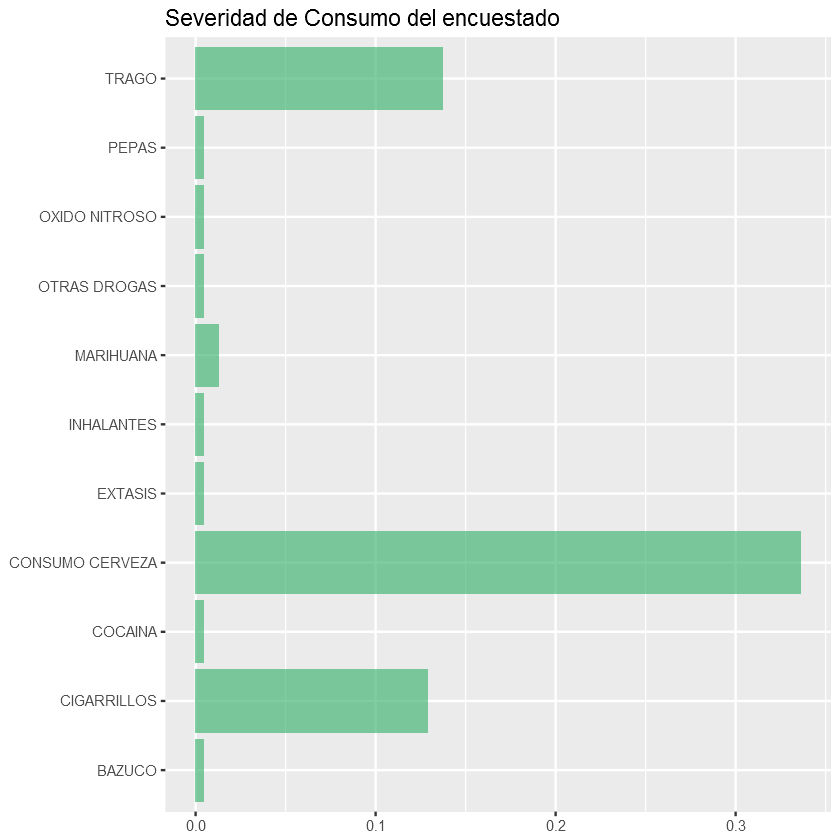

In [42]:
SPA_severidad_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[6]]
colnames(SPA_severidad_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[6]]
head(SPA_severidad_encuestado)

severidad_encuestado_prom=data.frame(colMeans(SPA_severidad_encuestado))
colnames(severidad_encuestado_prom)="Promedio"
severidad_encuestados_prom=data.frame(Fuente=rownames(severidad_encuestado_prom),Promedio=severidad_encuestado_prom$Promedio)
severidad_encuestados_prom=severidad_encuestados_prom[severidad_encuestados_prom$Promedio>0,]
severidad_encuestados_prom=severidad_encuestados_prom[order(-severidad_encuestados_prom$Promedio),]
severidad_encuestados_prom

ggplot(severidad_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Severidad de Consumo del encuestado")
ggsave(paste("Severidad de Consumo del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0


,Fuente,Promedio
1,CONSUMO CERVEZA,0.468879668049793
2,TRAGO,0.224066390041494
11,CIGARRILLOS,0.195020746887967
3,MARIHUANA,0.182572614107884
6,BAZUCO,0.0829875518672199
4,COCAINA,0.020746887966805
8,INHALANTES,0.012448132780083


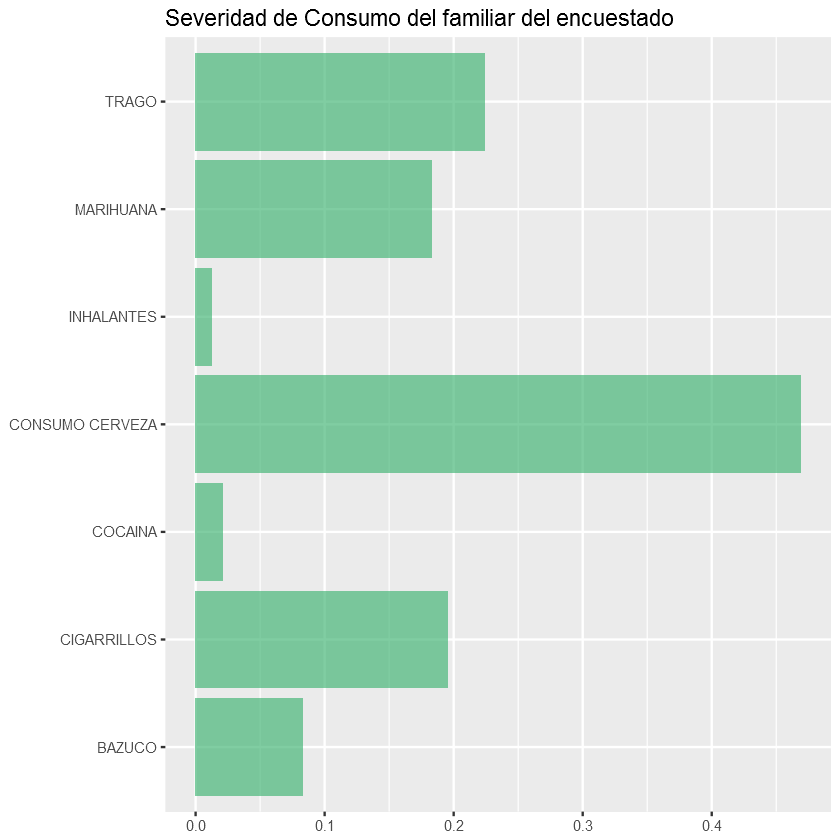

In [43]:
SPA_severidad_familiar_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[7]]
colnames(SPA_severidad_familiar_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[7]]
head(SPA_severidad_familiar_encuestado)

severidad_familiar_encuestado_prom=data.frame(colMeans(SPA_severidad_familiar_encuestado))
colnames(severidad_familiar_encuestado_prom)="Promedio"
severidad_familiar_encuestados_prom=data.frame(Fuente=rownames(severidad_familiar_encuestado_prom),Promedio=severidad_familiar_encuestado_prom$Promedio)
severidad_familiar_encuestados_prom=severidad_familiar_encuestados_prom[severidad_familiar_encuestados_prom$Promedio>0,]
severidad_familiar_encuestados_prom=severidad_familiar_encuestados_prom[order(-severidad_familiar_encuestados_prom$Promedio),]
severidad_familiar_encuestados_prom

ggplot(severidad_familiar_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Severidad de Consumo del familiar del encuestado")
ggsave(paste("Severidad de Consumo del familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)
